In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
import os
os.getcwd()

In [10]:
with open('../../stubs/track_stubs.pkl', 'rb') as f:
    data = pickle.load(f)

In [37]:
data.keys()

dict_keys(['players', 'referees', 'ball'])

In [ ]:
players_data = data['players']
players_data

In [ ]:
for player_info in players_data:
    for player_id, details in player_info.items():
        print(f"Player ID: {player_id}")
        if 'bbox' in details:
            bbox = details['bbox']
            print(f"Bounding Box: {bbox}")
        else:
            print(f"bbox não encontrada para esse jogador.")

In [32]:
def get_player_positions(players_data):
    player_positions = []
    
    for player_info in players_data:
        for player_id, details in player_info.items():
            print(f"Player ID: {player_id}")
            if 'bbox' in details:
                bbox = details['bbox']
                # center of bbox
                x_center = (bbox[0] + bbox[2]) / 2
                y_center = (bbox[1] + bbox[3]) / 2
                player_positions.append((x_center, y_center))
                print(f"Bounding Box: {bbox}")
            else:
                print(f"bbox não encontrada para esse jogador.")
    return player_positions

Player ID: 1
Bounding Box: [563.2994384765625, 175.12335205078125, 586.3995361328125, 235.877197265625]
Player ID: 2
Bounding Box: [610.6536254882812, 313.2225341796875, 643.3416137695312, 386.0743408203125]
Player ID: 3
Bounding Box: [718.6451416015625, 436.59918212890625, 746.6871337890625, 525.7267456054688]
Player ID: 4
Bounding Box: [242.00851440429688, 238.15264892578125, 276.9924011230469, 310.26434326171875]
Player ID: 5
Bounding Box: [110.25411987304688, 222.90216064453125, 142.9995574951172, 298.9422607421875]
Player ID: 6
Bounding Box: [1030.176513671875, 335.6659851074219, 1070.900634765625, 408.5937194824219]
Player ID: 7
Bounding Box: [354.12457275390625, 387.37261962890625, 376.52825927734375, 465.4873046875]
Player ID: 8
Bounding Box: [865.4879150390625, 484.1339416503906, 897.3724365234375, 561.4151611328125]
Player ID: 9
Bounding Box: [1209.278076171875, 130.99502563476562, 1242.285400390625, 189.50592041015625]
Player ID: 10
Bounding Box: [841.5211791992188, 328.5878

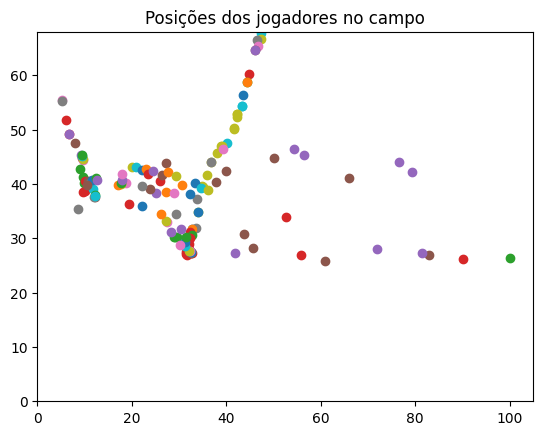

In [34]:
import matplotlib.pyplot as plt

# Coordenadas do campo de futebol (em metros, ajustadas conforme necessário)
field_length = 105  # Comprimento do campo
field_width = 68  # Largura do campo

# Extraindo as posições dos jogadores
players_data = data['players']
player_positions = get_player_positions(players_data)

# Criar o gráfico do campo
fig, ax = plt.subplots()
ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)
ax.set_title("Posições dos jogadores no campo")

# Plotar as posições dos jogadores
for pos in player_positions:
    ax.plot(pos[0], pos[1], 'o')  # ponto representando um jogador

plt.show()


In [25]:
x_center = (bbox[0] + bbox[2]) / 2  # Média entre as coordenadas x da bounding box
y_center = (bbox[1] + bbox[3]) / 2  # Média entre as coordenadas y da bounding box

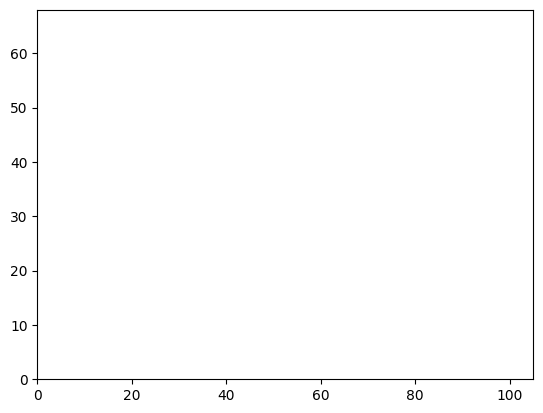

In [31]:
import matplotlib.pyplot as plt

# Coordenadas do campo de futebol (ajustadas conforme necessário)
field_length = 105  # em metros
field_width = 68  # em metros

fig, ax = plt.subplots()
ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)

# Exemplo de lista de posições dos jogadores
player_positions = [(x_center, y_center)]

# Plotar as posições dos jogadores
for pos in player_positions:
    ax.plot(pos[0], pos[1], 'o')  # ponto representando um jogador

plt.show()


In [41]:
# Definir dimensões do campo de futebol (em metros)
field_length = 105  # comprimento do campo
field_width = 68    # largura do campo

# Função para extrair a posição do jogador com base no bbox
def extract_player_positions(players_data):
    player_positions = []
    for player_info in players_data:
        for player_id, details in player_info.items():
            if 'bbox' in details:
                bbox = details['bbox']
                # Calcular a posição central da bounding box
                x_center = (bbox[0] + bbox[2]) / 2  # (xmin + xmax) / 2
                y_center = (bbox[1] + bbox[3]) / 2  # (ymin + ymax) / 2
                player_positions.append((x_center, y_center))
    return player_positions

# Obter as posições dos jogadores
player_positions = extract_player_positions(players_data)

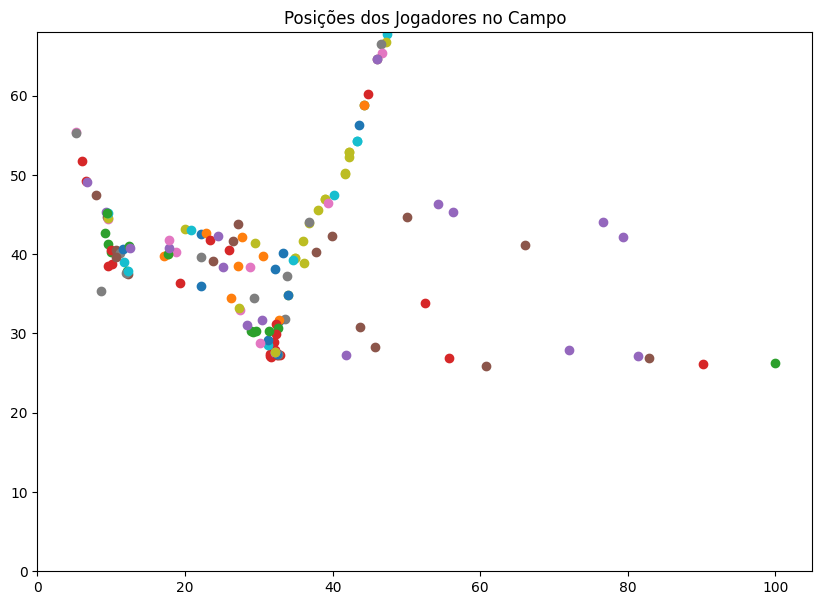

In [42]:

# Obter as posições dos jogadores
player_positions = extract_player_positions(players_data)

# Plotar o campo de futebol e as posições dos jogadores
fig, ax = plt.subplots(figsize=(10, 7))

# Desenhar o campo de futebol
ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)
ax.set_title('Posições dos Jogadores no Campo')

# Plotar as posições dos jogadores
for pos in player_positions:
    ax.plot(pos[0], pos[1], 'o', label='Jogador')

plt.show()

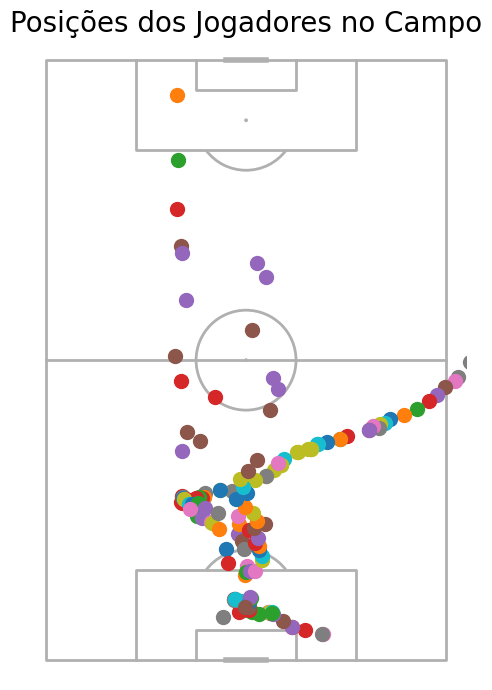

In [44]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

# Configurar o campo utilizando o pitch da StatsBomb
pitch = VerticalPitch(pitch_type='statsbomb', half=False)  # Você pode definir half=False para campo completo

fig, ax = pitch.draw(figsize=(10, 7))

# Plotar as posições dos jogadores
for player_id, (x, y) in enumerate(player_positions):
    pitch.scatter(x, y, ax=ax, label=f'Player {player_id}', s=100)

# Título e exibição
ax.set_title('Posições dos Jogadores no Campo', fontsize=20)
plt.show()
